# Stats
--> TODO: Need to dig further on these np and scipy functions to check other params

In [6]:
#Mean, Median, Mode, Standard Deviation, Variance

import numpy as np
from scipy import stats

data = [1,1,2,2,3,4,9,9,9,9,9]

mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
s = np.std(data)
variance = np.var(data)

print(mean)
print(median)
print(mode)
print(s)
print(variance)

data = [1,1,2,2,3,4,9,9] # now we have 3 modes
print(stats.mode(data)) # but this doesn't give all modes, just one of them

5.2727272727272725
4.0
ModeResult(mode=array([9]), count=array([5]))
3.492613220417917
12.198347107438014
ModeResult(mode=array([1]), count=array([2]))


## Funtion to find multi-mode

In [18]:
import numpy as np
def find_mode(data) :
    item_count_dict = {}
    for i in data:
        if(i in item_count_dict):
            item_count_dict[i] = item_count_dict[i] + 1
        else:
            item_count_dict[i] = 1

    max_val = np.max(np.array([i for i in item_count_dict.values()]))
    modes_lst = []
    if max_val > 1:
        for i,j in item_count_dict.items():
            if(j==max_val):
                modes_lst.append(i)

        if len(modes_lst) == 1:
            return f"Single mode:{modes_lst}, count={max_val}"
        else:
            return f"Multi mode:{modes_lst}, count={max_val}"
    else:
        return "No mode"

data = [1,1,2,2,3,4,9,9] # multi-mode [1,2,9]
print(find_mode(data))
data = [1,1,2,2,3,4,9,9,9,9,9] # single mode 9
print(find_mode(data))
data = [1,2,3,4,9] # no mode
print(find_mode(data))

Multi mode:[1, 2, 9], count=2
Single mode:[9], count=5
No mode


## 5-number/5-point summary

In [25]:
import numpy as np

def fivept(data):
    """To find out the Five number summary"""
    
    return np.percentile(data, [0, 25, 50, 75, 100], interpolation = 'midpoint')

datapoints = [0, 0, 1, 2, 63, 61, 27, 13]

five_point_summary = fivept(datapoints)
print(f'Min={five_point_summary[0]}, Q1={five_point_summary[1]}, Median(Q2)={five_point_summary[2]}, Q3={five_point_summary[3]}, Max={five_point_summary[4]}')
print(f'Range={five_point_summary[4]-five_point_summary[0]}, IQR(Q3-Q1)={five_point_summary[3]-five_point_summary[1]}')


Min=0.0, Q1=0.5, Median(Q2)=7.5, Q3=44.0, Max=63.0
Range=63.0, IQR(Q3-Q1)=43.5


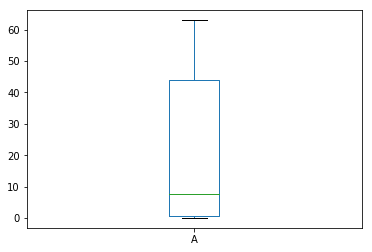

In [35]:
#Box Plot
import pandas as pd
import numpy as np
# df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df = pd.DataFrame(five_point_summary, columns=['A'])
# print(df)
df.plot.box()
#df.describe()

## Skewness & Kurtosis

In [38]:
#Skewness & Kurtosis
import numpy as np
from scipy.stats import kurtosis, skew
# x = np.random.normal(0, 2, 10000)   # create random values based on a normal distribution

print(skew(datapoints)) # Right skewed as seen in above boxplot, top box is taller
print(kurtosis(datapoints)) # gives excess kurtosis, as excess kurtosis<0, platykurtic (need to brush up what this means!)

0.8240470530860061
-1.0340451097899879


## Finding Outliers

In [40]:
#Finding Outliers
#IQR Method

import numpy as np
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, -18,1, 1, 2]
def Outlier_detection(var):
    Q1, Q3 = np.percentile(var, [25,75])
    IQR = Q3-Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    out = [i for i in var if (i > upper_bound) or (i < lower_bound)]
    
    #return np.where((var > upper_bound) | (var < lower_bbound))
    return out

Outlier_detection(data)

[15, -18]

In [45]:
#Finding Outliers
#Z-Score Method

import numpy as np
# data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2] 
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, -18,1, 1, 2]
mean = np.mean(data) 
std = np.std(data)

print('mean of the dataset is', mean) 
print('std. deviation is', std) 

threshold = 3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z < 0:
        z = z * -1 # so we can just compare the absolute val
    print(i, z)
    if (z > threshold): 
        outlier.append(i) 
print('outlier in dataset is', outlier) # 15 2.283254568825838 --> so 15 is not considered here

mean of the dataset is 1.375
std. deviation is 5.967359131140006
1 0.06284186886676618
2 0.10473644811127697
2 0.10473644811127697
2 0.10473644811127697
3 0.2723147650893201
1 0.06284186886676618
1 0.06284186886676618
15 2.283254568825838
2 0.10473644811127697
2 0.10473644811127697
2 0.10473644811127697
3 0.2723147650893201
-18 3.246829891449586
1 0.06284186886676618
1 0.06284186886676618
2 0.10473644811127697
outlier in dataset is [-18]


## Co-Variance

In [48]:
#Finding Co-variance
# gives direction of relationship
import numpy as np 
x = [1.23, 2.12, 3.34, 4.5]   
y = [2.56, 2.89, 3.76, 3.95]   

cov_mat = np.array([x, y])    
print(cov_mat)
print(np.cov(cov_mat))

[[1.23 2.12 3.34 4.5 ]
 [2.56 2.89 3.76 3.95]]
[[2.03629167 0.9313    ]
 [0.9313     0.4498    ]]


## Correlation Coefficient - Pearson & Spearman

In [50]:
# Finding Correlation between variables 
# co-relation gives strength and direction of relationship
import numpy as np
import scipy.stats
x = np.array([10, 20,30,80,34,24,12,18,98,102])
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(scipy.stats.pearsonr(x, y)[0])    # Pearson's r
print(scipy.stats.spearmanr(x, y)[0])   # Spearman's correlation(used for non-linear relationship, but how do we decide it's non-linear relationship, by graph? by equation?)

0.697767764291663
0.4424242424242424
